In [12]:
import warnings
warnings.filterwarnings("ignore")

from causalnex.structure import StructureModel
sm = StructureModel()

In [13]:
SUB_ELEMENTS_REVERSED = {
    1:'arco-herradura',
    2:'dintel-adovelado',
    3:'arco-lobulado',
    4:'arco-medio-punto',
    5:'arco-apuntado',
    6:'vano-adintelado',
    7:'fronton',
    8:'arco-conopial',
    9:'arco-trilobulado',
    10:'serliana',
    11:'ojo-de-buey',
    12:'fronton-curvo',
    13:'fronton-partido',
    14:'columna-salomonica'
}

ELEMENTS_LABEL = {
    1:['01.musulman'],
    2:['01.musulman'],
    3:['01.musulman'],
    4: ['03.renacentista','04.barroco'],
    5:['02.gotico'],
    6:['03.renacentista','04.barroco'],
    7: ['03.renacentista'], 
    8:['02.gotico'],
    9:['02.gotico'],
    10:['03.renacentista'],
    11: ['03.renacentista','04.barroco'],
    12:['03.renacentista'],
    13:['04.barroco'],
    14:['04.barroco']
}

In [14]:
styles = set()

for k in ELEMENTS_LABEL:
    for style in ELEMENTS_LABEL[k]:
        sm.add_edges_from(
        [(SUB_ELEMENTS_REVERSED[k],style)]
        )
        styles.add(style)
styles = list(styles)
styles.sort()

In [15]:
sm.edges

OutEdgeView([('arco-herradura', '01.musulman'), ('dintel-adovelado', '01.musulman'), ('arco-lobulado', '01.musulman'), ('arco-medio-punto', '03.renacentista'), ('arco-medio-punto', '04.barroco'), ('arco-apuntado', '02.gotico'), ('vano-adintelado', '03.renacentista'), ('vano-adintelado', '04.barroco'), ('fronton', '03.renacentista'), ('arco-conopial', '02.gotico'), ('arco-trilobulado', '02.gotico'), ('serliana', '03.renacentista'), ('ojo-de-buey', '03.renacentista'), ('ojo-de-buey', '04.barroco'), ('fronton-curvo', '03.renacentista'), ('fronton-partido', '04.barroco'), ('columna-salomonica', '04.barroco')])

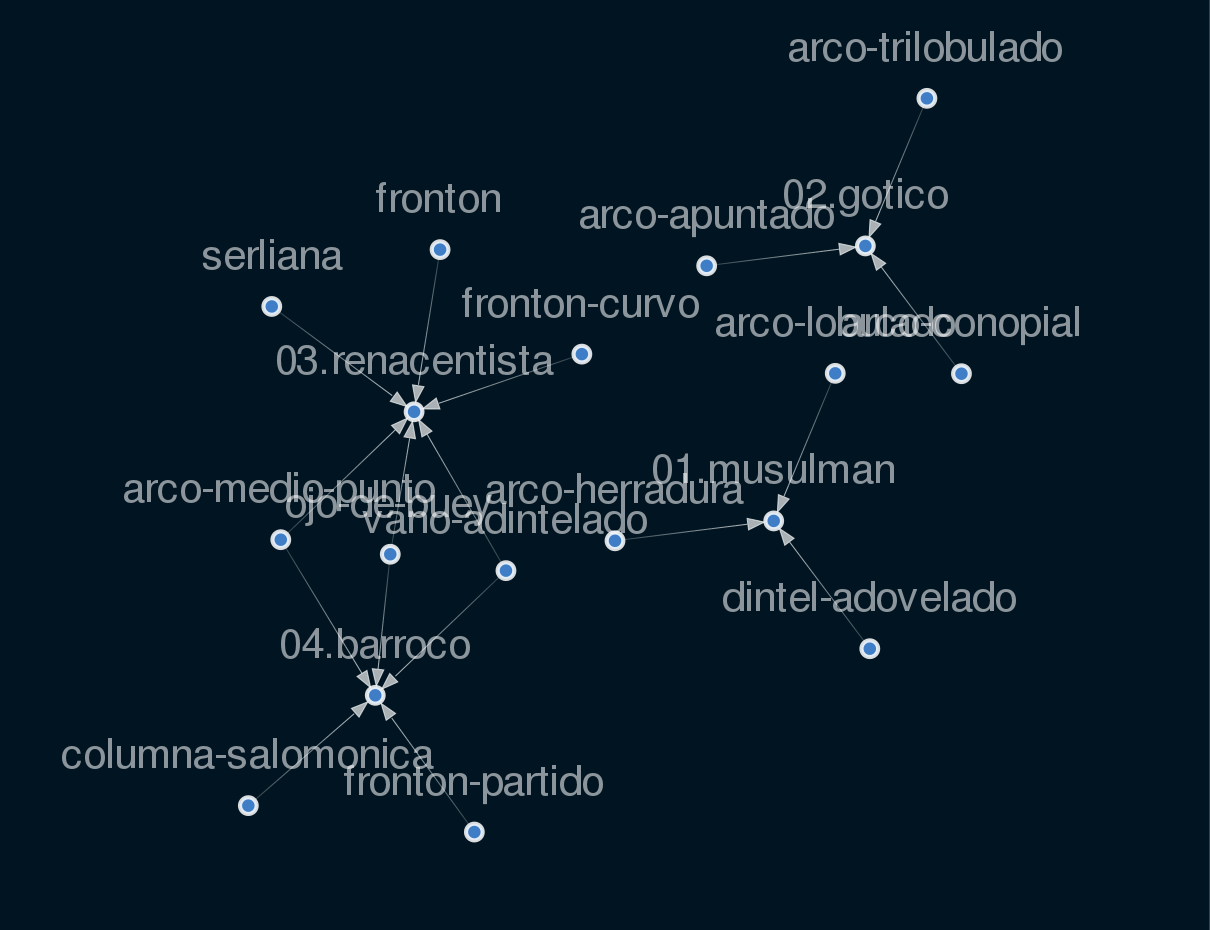

In [16]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [17]:
import pandas as pd
from tools.metadata_tools import *
test = '../Results/json_detection'
train = '../Results/json_detection/train'
model = 'models/trainingJSON_2020-06-16_12:32:03'
from tensorflow.python.keras.models import model_from_json

json = open(model+'.json', 'r')
model_json = json.read()
json.close()
loaded_model = model_from_json(model_json)
loaded_model.load_weights(model+'.h5')

matrix_metadata = metadata_to_matrix(train, "json")
test_data = matrix_metadata[:,:14].astype(np.float32)
from keras.utils import to_categorical
test_label = to_categorical(matrix_metadata[:,14].astype(np.float32).astype(np.int8))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


In [18]:
from monumai.monument import Monument
names = [el for sublist in list(Monument.ELEMENT_DIC.values()) for el in sublist]
dicDF = {}
for k in range(len(names)):
    name = names[k]
    dicDF[name] = test_data[:,k]
for k in range(len(styles)):
    dicDF[styles[k]] = test_label[:,k].astype(np.int8)
dataset = pd.DataFrame(dicDF)

In [19]:
matrix_metadata = metadata_to_matrix(test, "json")
test_data = matrix_metadata[:,:14].astype(np.float32)
from keras.utils import to_categorical
test_label = to_categorical(matrix_metadata[:,14].astype(np.float32).astype(np.int8))

for k in range(len(names)):
    name = names[k]
    dicDF[name] = test_data[:,k]
    
for k in range(len(styles)):
    dicDF[styles[k]] = test_label[:,k].astype(np.int8)
    
dataset_test = pd.DataFrame(dicDF)

In [20]:
dataset

,arco-herradura,arco-lobulado,dintel-adovelado,arco-apuntado,arco-conopial,arco-trilobulado,fronton,fronton-curvo,serliana,arco-medio-punto,vano-adintelado,ojo-de-buey,fronton-partido,columna-salomonica,01.musulman,02.gotico,03.renacentista,04.barroco
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153560,0.805012,0.000000,0.000000,1.995818,0.000000,0.776328,0.000000,0,0,0,1
1,0.141287,0.056985,0.053891,0.051114,1.051601,0.051493,0.053469,0.051261,0.057698,0.000000,0.412078,0.054095,0.052472,0.056226,0,1,0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.351792,0.000000,0.000000,0.000000,0.000000,0,0,0,1
3,1.093669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0
4,0.104972,0.000000,0.069752,2.722282,0.513537,0.000000,3.349778,0.231422,0.156325,5.879138,0.000000,0.310540,0.000000,0.000000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.295515,1.913670,0.000000,2.961593,0.000000,0.000000,0,0,1,0
716,0.998807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0
717,0.994000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0
718,2.991502,0.000000,1.992978,0.000000,0.000000,0.000000,0.000000,0.000000,0.158911,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0


In [21]:
from causalnex.structure.notears import from_pandas
sm = from_pandas(dataset)

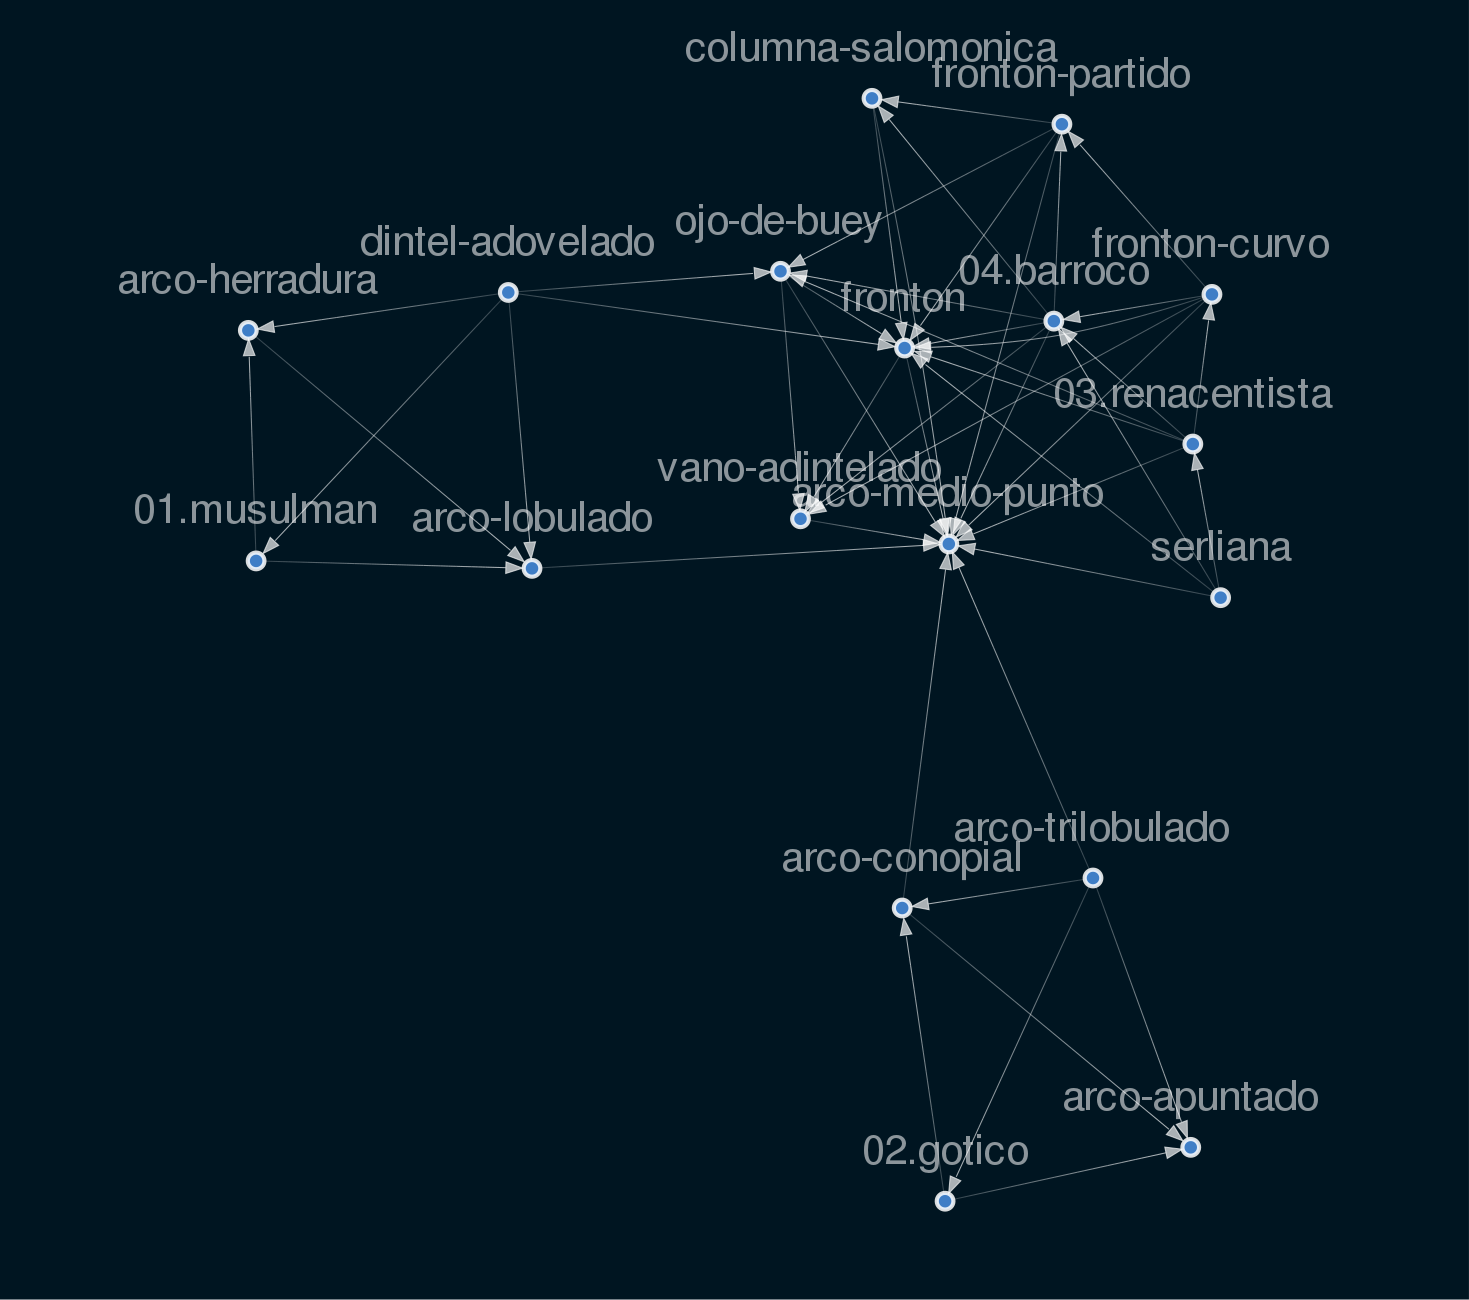

In [24]:
sm.remove_edges_below_threshold(0.1)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "1"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [31]:
from causalnex.network import BayesianNetwork

bn = BayesianNetwork(sm)

In [32]:
from causalnex.discretiser import Discretiser

discretised_data = dataset.copy()


for name in dicDF.keys() :
    if name not in styles:
        disc = Discretiser(method="quantile",num_buckets=10).fit(discretised_data[name].values)
        discretised_data[name] = disc.transform(discretised_data[name].values)
        dataset_test[name] = disc.transform(dataset_test[name].values)

In [33]:
bn = bn.fit_node_states(discretised_data)
bn = bn.fit_cpds(discretised_data, method="BayesianEstimator", bayes_prior="K2")

In [34]:
predictions = bn.predict(dataset_test, styles[0])


In [36]:
print('The prediction is \'{prediction}\''.format(prediction=predictions.loc[18, styles[0]+'_prediction']))
print('The ground truth is \'{truth}\''.format(truth=discretised_data.loc[18, styles[0]]))


The prediction is '0'
The ground truth is '0'


In [43]:
from causalnex.evaluation import classification_report
np.sum(discretised_data[styles[0]])

167